# 100_analysis_RQ1

## Purpose

It is time to start to analyse and explore our newly validated and prepared dataset.
This notebook will be focused on analysis for our first RQ:

* "Is there correlation between a company’s industry and location, with the funding they receive?"

This notebook will look at the USA in particular. We will inestigate the top industries in terms of their funding and dominance in each state of USA. Once we have analysised and normalized these values in enough detail, we will be able to conclude this RQ.

This notebook mainly focuses on two things in particular:
* Calculating the dominance of each industry in each state, in terms of the number of companies in each industry, as a fraction.
* Calculating the dominance of each industry in each state, in terms of the amount of funding companies in each industry demand, as a fraction.
* After calculating the above two figures, we get a normalized value in order to make our results more accurate.


## Datasets
* _Input_: 300_dataset1.pkl
* _Output_: 100_analysis_RQ1.pkl



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['patch.force_edgecolor'] = True

# Industry and Location

## Importing dataset 1

This dataset contains information about each company, including information such as the category/categories the company operates under, the amount of funding the company has recieved in USD, as well as the company name and location. These are the main pieces of information we will be dealing with for research question 1. 

In [3]:
industry = pd.read_pickle('../../data/processed/300_dataset1.pkl')
industry.shape

(78357, 53)

Below we have printed the first 5 rows in the dataset. This is important for us to do at the beginning of our notebooks as it gives us an insight into the dataframe we will be dealing with for our analysis.

In [4]:
industry.head(5)

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,Intel,"company,investor",USA,CA,SF Bay Area,Santa Clara,ipo,"Hardware,Manufacturing,Product Design,Semicond...","Design,Hardware,Manufacturing,Science and Engi...",1,2510000.0,1968-07-31,1968-07-18,10000+,1e4f199c-363b-451b-a164-f94571075ee5,company,organization,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Intercomp,company,USA,OH,Cleveland,Medina,operating,"Hardware,Software","Hardware,Software",1,549000.0,1970-12-31,1968-01-01,101-250,6681b1b0-0cea-6a4a-820d-60b15793fa66,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Microsoft,"company,investor",USA,WA,Seattle,Redmond,ipo,"Cloud Computing,Collaboration,Consumer Electro...","Consumer Electronics,Hardware,Internet Service...",1,1000000.0,1981-09-01,1975-04-04,10000+,fd80725f-53fc-7009-9878-aeecf1e9ffbb,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Compaq,"company,investor",USA,CA,SF Bay Area,Palo Alto,acquired,"Hardware,Information Technology,Software","Hardware,Information Technology,Software",1,1500000.0,1982-02-14,1982-02-14,11-50,10a3b2fd-b142-046b-7d8f-3b1aa4877aca,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Toyota Motor Corporation,"company,investor",JPN,Unknown,Unknown,Unknown,ipo,"Automotive,Mobile,Transportation","Mobile,Transportation",1,42000000.0,1982-04-14,1937-08-28,10000+,12b90373-ab49-a56a-4b4e-c7b3e9236faf,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


It is interesting to have a look at the number of employees working in the companies of our dataset, as we expected the there are a lot more companies with a smaller number of employees. This is quite intuitive as it is obviously a lot easier to set up a company with a smaller number of staff in comparison with the larger companies employing upwards of 1000 employees.

In [5]:
industry['employee_count'].value_counts()

11-50         25371
1-10          24983
unknown       12502
51-100         6532
101-250        3083
251-500        1886
501-1000       1789
1001-5000       999
10000+          662
5001-10000      550
Name: employee_count, dtype: int64

# USA - ANALYSIS

As mentioned in the opening cell of this notebook, we will only be focusing on the analysis of the USA in this notebook. To begin we have to create a dataframe containing only the companies with a country code of "USA". Once again we print the first 5 rows of this new dataframe for clarity and to ensure that we have a clear view of the dataframe we are dealing with in order to pursue with our analysis. 

In [6]:
usa_df = industry[industry['country_code'] == 'USA']

In [7]:
usa_df.head(5)

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,Intel,"company,investor",USA,CA,SF Bay Area,Santa Clara,ipo,"Hardware,Manufacturing,Product Design,Semicond...","Design,Hardware,Manufacturing,Science and Engi...",1,2510000.0,1968-07-31,1968-07-18,10000+,1e4f199c-363b-451b-a164-f94571075ee5,company,organization,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Intercomp,company,USA,OH,Cleveland,Medina,operating,"Hardware,Software","Hardware,Software",1,549000.0,1970-12-31,1968-01-01,101-250,6681b1b0-0cea-6a4a-820d-60b15793fa66,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Microsoft,"company,investor",USA,WA,Seattle,Redmond,ipo,"Cloud Computing,Collaboration,Consumer Electro...","Consumer Electronics,Hardware,Internet Service...",1,1000000.0,1981-09-01,1975-04-04,10000+,fd80725f-53fc-7009-9878-aeecf1e9ffbb,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Compaq,"company,investor",USA,CA,SF Bay Area,Palo Alto,acquired,"Hardware,Information Technology,Software","Hardware,Information Technology,Software",1,1500000.0,1982-02-14,1982-02-14,11-50,10a3b2fd-b142-046b-7d8f-3b1aa4877aca,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,Electronic Arts,"company,investor",USA,CA,SF Bay Area,Redwood City,ipo,"Computer,Video Games,Web Development","Consumer Electronics,Gaming,Hardware,Software",2,2200000.0,1982-12-01,1982-01-01,5001-10000,5a6207e2-b868-9f41-5178-8d51d2c40a93,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Printing out a list of the columns names as shown below is very beneficial when it comes to further analysis as we can now copy and paste multiple column names into future cells. By listing the column names it also gives us a different presepective into the dataframe we are dealing with.

In [8]:
list(usa_df)

['company_name',
 'roles',
 'country_code',
 'state_code',
 'region',
 'city',
 'status',
 'category_list',
 'category_group_list',
 'funding_rounds',
 'funding_total_usd',
 'last_funding_on',
 'founded_on',
 'employee_count',
 'org_uuid',
 'primary_role',
 'type',
 'Administrative Services',
 'Advertising',
 'Agriculture and Farming',
 'Biotechnology',
 'Clothing and Apparel',
 'Commerce and Shopping',
 'Community and Lifestyle',
 'Consumer Goods',
 'Content and Publishing',
 'Design',
 'Education',
 'Energy',
 'Events',
 'Food and Beverage',
 'Government and Military',
 'Hardware',
 'Health Care',
 'Manufacturing',
 'Media and Entertainment',
 'Music and Audio',
 'Natural Resources',
 'Navigation and Mapping',
 'Platforms',
 'Privacy and Security',
 'Professional Services',
 'Real Estate',
 'Sales and Marketing',
 'Science and Engineering',
 'Sports',
 'Sustainability',
 'Transportation',
 'Travel and Tourism',
 'Video',
 'Technology',
 'Finance',
 'Communication']

Now that we have decided to look at each individual state in USA, it is quite crucial to know the dominance of certain states in terms of the amount of companies in each state. As we suspected states like California and New York top the list for the most amount of companies. Whereas the Virgin Islands only have 6 companies. This is one of the main reasons we have chosen to normalize or data, to avoid skewed results.

In [9]:
usa_df['state_code'].value_counts()

CA         15548
NY          5029
MA          3109
TX          2370
WA          1526
FL          1395
IL          1205
CO          1153
PA          1133
VA           851
GA           840
NC           764
NJ           745
OH           735
MD           701
MN           551
TN           525
UT           481
CT           480
AZ           467
MI           457
OR           454
MO           355
WI           316
DC           312
IN           308
NV           263
KY           199
SC           179
NH           155
DE           148
AL           134
KS           131
RI           121
IA           110
NE           108
LA           106
ME            97
NM            96
ID            93
OK            93
Unknown       88
AR            85
HI            80
VT            65
MT            44
MS            31
WY            30
ND            25
SD            20
WV            16
AK            15
VI             6
Name: state_code, dtype: int64

** First Step... **

In order to calculate the first part of our analysis:
* The dominance of each industry in each state, in terms of the number of companies in each industry, as a fraction.

We need to begin by summing up the number of industries in each category in each individual state. This is obviously crucial in the path to obtain a fraction for the dominance of each industry in each. 
* Below we are creating a dataframe that sums the values of each column based on their state code.

In [10]:
usa_state_industry_df = usa_df[usa_df.country_code == 'USA'].groupby('state_code').sum().reset_index()
usa_state_industry_df

,state_code,funding_rounds,funding_total_usd,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,AK,32,9.467828e+07,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,2,4,4,1,0,0,1,0,0,0,2,1,2,0,0,1,0,1,6,0,1
1,AL,206,2.923815e+09,2,1,2,38,0,9,3,2,5,4,7,0,2,4,3,18,55,6,8,1,0,0,1,5,5,4,3,44,2,0,5,1,1,57,6,12
2,AR,159,8.480094e+08,0,2,1,8,2,12,2,3,2,5,10,2,0,0,2,12,24,4,11,1,1,0,1,2,2,0,5,10,1,2,3,2,2,32,7,9
3,AZ,898,7.069947e+09,2,20,4,39,4,45,14,8,12,12,25,20,3,14,7,56,111,27,52,8,14,0,4,18,14,19,50,66,18,20,29,13,10,226,47,64
4,CA,38933,4.726315e+11,123,719,80,1257,218,1633,478,272,764,619,557,479,201,324,113,2883,2405,760,2682,317,255,193,298,735,449,441,1427,2306,384,453,635,357,723,10076,1169,2809
5,CO,2706,2.126179e+10,6,50,12,89,12,106,46,24,44,45,56,63,11,50,15,158,221,61,125,10,47,14,12,55,33,56,86,133,43,58,35,38,33,654,96,135
6,CT,984,1.905157e+10,2,16,1,74,1,46,10,12,13,8,26,20,11,11,6,63,121,39,49,7,10,5,5,16,7,9,39,93,14,18,13,9,10,226,56,48
7,DC,626,7.280044e+09,4,14,2,10,6,32,18,4,17,21,32,9,5,12,16,22,31,6,58,5,3,9,4,10,12,14,30,17,7,10,11,10,6,181,37,37
8,DE,271,6.988645e+08,1,4,3,11,2,20,3,5,6,7,6,3,2,2,1,26,27,10,16,2,1,2,3,6,5,7,14,22,1,4,10,5,3,97,18,22
9,FL,2647,2.525575e+10,10,61,6,145,21,134,38,27,44,46,55,38,22,29,12,185,306,59,195,19,23,15,20,42,49,49,123,190,49,34,57,53,41,718,141,191


Using the list of the column names of each of the columns in the dataset printed earlier in the notebook it was easy to create the list below by simply copy and pasting the column names for each industry into the cell below. This list is useful for analysis as it concentrates soley on the industries

In [11]:
industry_list = ['Administrative Services',
                 'Advertising',
                 'Agriculture and Farming',
                 'Biotechnology',
                 'Clothing and Apparel',
                 'Commerce and Shopping',
                 'Community and Lifestyle',
                 'Consumer Goods',
                 'Content and Publishing',
                 'Design',
                 'Education',
                 'Energy',
                 'Events',
                 'Food and Beverage',
                 'Government and Military',
                 'Hardware',
                 'Health Care',
                 'Manufacturing',
                 'Media and Entertainment',
                 'Music and Audio',
                 'Natural Resources',
                 'Navigation and Mapping',
                 'Platforms',
                 'Privacy and Security',
                 'Professional Services',
                 'Real Estate',
                 'Sales and Marketing',
                 'Science and Engineering',
                 'Sports',
                 'Sustainability',
                 'Transportation',
                 'Travel and Tourism',
                 'Video',
                 'Technology',
                 'Finance',
                 'Communication']

Using the new list, 'industry_list' created in the above cell we can now calculate the sum of the number of companies in each industry in the entire USA. It is quite interesting looking at the results below, note how dominant the technology industry is. This is partly due to our grouping of the industries, but also due to the dominace and growth of the industry in the real world. Our reason for normalizing further in this notebook is due to the dominance of certain industries.

In [12]:
usa_state_industry_list = usa_df[usa_df.country_code == 'USA']
dict(usa_state_industry_list[industry_list].sum())

{'Administrative Services': 365,
 'Advertising': 1929,
 'Agriculture and Farming': 275,
 'Biotechnology': 4335,
 'Clothing and Apparel': 657,
 'Commerce and Shopping': 4538,
 'Communication': 6530,
 'Community and Lifestyle': 1339,
 'Consumer Goods': 771,
 'Content and Publishing': 1982,
 'Design': 1747,
 'Education': 1906,
 'Energy': 1649,
 'Events': 616,
 'Finance': 3770,
 'Food and Beverage': 1104,
 'Government and Military': 439,
 'Hardware': 6794,
 'Health Care': 8636,
 'Manufacturing': 2216,
 'Media and Entertainment': 6672,
 'Music and Audio': 781,
 'Natural Resources': 894,
 'Navigation and Mapping': 487,
 'Platforms': 671,
 'Privacy and Security': 1826,
 'Professional Services': 1314,
 'Real Estate': 1488,
 'Sales and Marketing': 3861,
 'Science and Engineering': 6586,
 'Sports': 1209,
 'Sustainability': 1502,
 'Technology': 25803,
 'Transportation': 1678,
 'Travel and Tourism': 1099,
 'Video': 1601}

Once again we decide to have a look at the first 5 rows in our dataframe to ensure we are on the right track in our analysis. Using the 'industry_list' created above we can specify to only print the industry columns. This makes it a lot easier to have an overview of these rows, and gives us a better prespective into what we are dealiing with.

In [13]:
usa_state_industry_list[industry_list].head(5)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


** Next Step... ** 

This step was another hugely important step in the journey to ensure our results are as accurate as possible. Certain states in our dataset had so few companies that they were very misleading in our results. For example if a country only had 2 companies and they were both in the technology sector, it would seem that said state is a great state to setup a technology business when we normalize this value when in reality it is nothing but an innacurate result. 

In order to combat this we removed industries in certain states if there were less than 51 companies in that industry. 
* Below we are removing industries with less than 51 companies in a state and setting the value to 0. 

In [14]:
usa_state_industry_df.loc[(usa_state_industry_df['Administrative Services'] <= 50), 'Administrative Services'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Advertising'] <= 50 ), 'Advertising'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Agriculture and Farming'] <= 50), 'Agriculture and Farming'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Biotechnology'] <= 50), 'Biotechnology'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Clothing and Apparel'] <= 50), 'Clothing and Apparel'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Commerce and Shopping'] <= 50), 'Commerce and Shopping'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Community and Lifestyle'] <= 50), 'Community and Lifestyle'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Consumer Goods'] <= 50), 'Consumer Goods'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Content and Publishing'] <= 50), 'Content and Publishing'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Design'] <= 50),  'Design'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Education'] <= 50), 'Education'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Energy'] <= 50), 'Energy'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Events'] <= 50), 'Events'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Food and Beverage'] <= 50), 'Food and Beverage'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Government and Military'] <= 50), 'Government and Military'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Hardware'] <= 50), 'Hardware'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Health Care'] <= 50), 'Health Care'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Manufacturing'] <= 50), 'Manufacturing'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Media and Entertainment'] <= 50), 'Media and Entertainment'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Music and Audio'] <= 50), 'Music and Audio'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Natural Resources'] <= 50), 'Natural Resources'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Navigation and Mapping'] <= 50), 'Navigation and Mapping'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Platforms'] <= 50), 'Platforms'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Privacy and Security'] <= 50), 'Privacy and Security'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Professional Services'] <= 50), 'Professional Services'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Real Estate'] <= 50), 'Real Estate'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Sales and Marketing'] <= 50), 'Sales and Marketing'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Science and Engineering'] <= 50), 'Science and Engineering'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Sports'] <= 50), 'Sports'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Sustainability'] <= 50), 'Sustainability'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Transportation'] <= 50), 'Transportation'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Travel and Tourism'] <= 50), 'Travel and Tourism'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Video'] <= 50), 'Video'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Technology'] <= 50), 'Technology'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Finance'] <= 50), 'Finance'] = 0
usa_state_industry_df.loc[(usa_state_industry_df['Communication'] <= 50), 'Communication'] = 0

Once again it is important to print out our dataframe to ensure our previous alteration was successful. As you can see below the above step was successful and industries with less than 51 companies have been set to '0'.

In [15]:
usa_state_industry_df.head(10)

,state_code,funding_rounds,funding_total_usd,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,AK,32,9.467828e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AL,206,2.923815e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
2,AR,159,8.480094e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AZ,898,7.069947e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,111,0,52,0,0,0,0,0,0,0,0,66,0,0,0,0,0,226,0,64
4,CA,38933,4.726315e+11,123,719,80,1257,218,1633,478,272,764,619,557,479,201,324,113,2883,2405,760,2682,317,255,193,298,735,449,441,1427,2306,384,453,635,357,723,10076,1169,2809
5,CO,2706,2.126179e+10,0,0,0,89,0,106,0,0,0,0,56,63,0,0,0,158,221,61,125,0,0,0,0,55,0,56,86,133,0,58,0,0,0,654,96,135
6,CT,984,1.905157e+10,0,0,0,74,0,0,0,0,0,0,0,0,0,0,0,63,121,0,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,226,56,0
7,DC,626,7.280044e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181,0,0
8,DE,271,6.988645e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,0,0
9,FL,2647,2.525575e+10,0,61,0,145,0,134,0,0,0,0,55,0,0,0,0,185,306,59,195,0,0,0,0,0,0,0,123,190,0,0,57,53,0,718,141,191


** Finally... ** 

In order to finish the calculation for the first part of our analysis:
* The dominance of each industry in each state, in terms of the number of companies in each industry, as a fraction.

We obviously need to calculate the fractions. We have already gotten the number of companies in each industry accross each state, as well as filtering out the industries with a small number of companies to avoid skewwed results. 
We now need to to find the find the total numer of companies in each state and divide the number in each industry by the total number of companies. 
* Below we are calculating the fraction of each industry in each state. We are doing this by dividing the total number of companies in the state, by the number of companies in each industry.


In [16]:
sum_state_industry = usa_state_industry_df.groupby('state_code')[industry_list].sum()
usa_sum_state_industry = sum_state_industry.div(sum_state_industry.sum(axis=1), axis=0)
usa_sum_state_industry.apply(lambda x: x.sum(),axis=1)
usa_sum_state_industry.head(5)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491071,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.508929,0.000000,0.000000
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097391,0.193043,0.000000,0.090435,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.114783,0.000000,0.000000,0.000000,0.000000,0.00000,0.393043,0.000000,0.111304
CA,0.003107,0.018159,0.002021,0.031747,0.005506,0.041244,0.012073,0.00687,0.019296,0.015634,0.014068,0.012098,0.005077,0.008183,0.002854,0.072814,0.060742,0.019195,0.067738,0.008006,0.00644,0.004874,0.007526,0.018563,0.01134,0.011138,0.036041,0.058241,0.009698,0.011441,0.016038,0.009017,0.01826,0.254483,0.029525,0.070945


Having printed the above dataframe, we can see that their are rows with 'NaN' values. These rows are essentially useless when it comes to any further analysis. Therefore it is best to drop these columns. 
* Below we are dropping the NaNrows from the dataset, and we store these NaN rows in a dataset in order to remove these rows from another dataset later in the notebook.

In [17]:
na_free = usa_sum_state_industry.dropna()
only_na = usa_sum_state_industry[~usa_sum_state_industry.index.isin(na_free.index)]
only_na

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping these NaN rows results in...**

In [18]:
usa_sum_state_industry=usa_sum_state_industry.dropna()
usa_sum_state_industry.head(10)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491071,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.508929,0.000000,0.000000
AZ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097391,0.193043,0.000000,0.090435,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.114783,0.000000,0.000000,0.000000,0.000000,0.00000,0.393043,0.000000,0.111304
CA,0.003107,0.018159,0.002021,0.031747,0.005506,0.041244,0.012073,0.00687,0.019296,0.015634,0.014068,0.012098,0.005077,0.008183,0.002854,0.072814,0.060742,0.019195,0.067738,0.008006,0.00644,0.004874,0.007526,0.018563,0.01134,0.011138,0.036041,0.058241,0.009698,0.011441,0.016038,0.009017,0.01826,0.254483,0.029525,0.070945
CO,0.000000,0.000000,0.000000,0.041357,0.000000,0.049257,0.000000,0.00000,0.000000,0.000000,0.026022,0.029275,0.000000,0.000000,0.000000,0.073420,0.102695,0.028346,0.058086,0.000000,0.00000,0.000000,0.000000,0.025558,0.00000,0.026022,0.039963,0.061803,0.000000,0.026952,0.000000,0.000000,0.00000,0.303903,0.044610,0.062732
CT,0.000000,0.000000,0.000000,0.116904,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099526,0.191153,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.146919,0.000000,0.000000,0.000000,0.000000,0.00000,0.357030,0.088468,0.000000
DC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.242678,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.757322,0.000000,0.000000
DE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
FL,0.000000,0.023345,0.000000,0.055492,0.000000,0.051282,0.000000,0.00000,0.000000,0.000000,0.021049,0.000000,0.000000,0.000000,0.000000,0.070800,0.117107,0.022579,0.074627,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.047072,0.072713,0.000000,0.000000,0.021814,0.020283,0.00000,0.274780,0.053961,0.073096
GA,0.000000,0.000000,0.000000,0.041333,0.000000,0.063333,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079333,0.108667,0.000000,0.075333,0.000000,0.00000,0.000000,0.000000,0.034000,0.00000,0.000000,0.057333,0.055333,0.000000,0.000000,0.000000,0.000000,0.00000,0.338667,0.066000,0.080667


** Second Part of Analysis **

In order to calculate the second part of our analysis:
* The dominance of each industry in each state, in terms of the amount of funding companies in each industry demand, as a fraction.

We need to begin by altering our dataframe. We do this by assigning the funding amount recieved by each company in place of its industry. We essentially create a copy of our original dataframe, only replacing the binary values with funding amounts. Even though the funding amounts will be repeated for companies in multiple industries, this will be consistent accross the whole dataframe. We will also be only be comparing individual industries, so this will have no negative impact on our results
* Below we are creating a dataframe by replacing the binary values with the funding amounts of the respective company.

In [19]:
fund_df = usa_df.copy()
fund_df.loc[fund_df['Commerce and Shopping'] == 1 , 'Commerce and Shopping'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Biotechnology'] ==1 , 'Biotechnology'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Technology'] ==1 , 'Technology'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Health Care'] ==1 , 'Health Care'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Hardware'] ==1 , 'Hardware'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Media and Entertainment'] ==1 , 'Media and Entertainment'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Science and Engineering'] ==1 , 'Science and Engineering'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Communication'] ==1 , 'Communication'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Sales and Marketing'] == 1 , 'Sales and Marketing'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Finance'] == 1 , 'Finance'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Administrative Services'] ==1 , 'Administrative Services'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Advertising'] == 1 , 'Advertising'] = fund_df['funding_total_usd']
fund_df.loc[fund_df[ 'Agriculture and Farming'] == 1 ,  'Agriculture and Farming'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Clothing and Apparel'] ==1 ,  'Clothing and Apparel'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Community and Lifestyle'] == 1 , 'Community and Lifestyle'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Consumer Goods'] == 1 ,  'Consumer Goods'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Content and Publishing'] ==1 , 'Content and Publishing'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Design'] == 1 , 'Design'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Education'] == 1 , 'Education'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Energy'] ==1 , 'Energy'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Events'] == 1 , 'Events'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Food and Beverage'] == 1 , 'Food and Beverage'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Government and Military'] ==1 ,  'Government and Military'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Manufacturing'] == 1 , 'Manufacturing'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Music and Audio'] == 1 , 'Music and Audio'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Natural Resources'] ==1 ,  'Natural Resources'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Navigation and Mapping'] == 1 , 'Navigation and Mapping'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Platforms'] == 1 , 'Platforms'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Privacy and Security'] ==1 ,  'Privacy and Security'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Professional Services'] == 1 , 'Professional Services'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Real Estate'] == 1 , 'Real Estate'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Sports'] ==1 ,  'Sports'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Sustainability'] == 1 , 'Sustainability'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Transportation'] == 1 , 'Transportation'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Travel and Tourism'] ==1 ,  'Travel and Tourism'] = fund_df['funding_total_usd']
fund_df.loc[fund_df['Video'] == 1 , 'Video'] = fund_df['funding_total_usd']
fund_df.head(5)

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,Intel,"company,investor",USA,CA,SF Bay Area,Santa Clara,ipo,"Hardware,Manufacturing,Product Design,Semicond...","Design,Hardware,Manufacturing,Science and Engi...",1,2510000.0,1968-07-31,1968-07-18,10000+,1e4f199c-363b-451b-a164-f94571075ee5,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2510000.0,0.0,0.0,0.0,0.0,0.0,2510000.0,0.0,2510000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2510000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Intercomp,company,USA,OH,Cleveland,Medina,operating,"Hardware,Software","Hardware,Software",1,549000.0,1970-12-31,1968-01-01,101-250,6681b1b0-0cea-6a4a-820d-60b15793fa66,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,549000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,549000.0,0.0,0.0
2,Microsoft,"company,investor",USA,WA,Seattle,Redmond,ipo,"Cloud Computing,Collaboration,Consumer Electro...","Consumer Electronics,Hardware,Internet Service...",1,1000000.0,1981-09-01,1975-04-04,10000+,fd80725f-53fc-7009-9878-aeecf1e9ffbb,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0
3,Compaq,"company,investor",USA,CA,SF Bay Area,Palo Alto,acquired,"Hardware,Information Technology,Software","Hardware,Information Technology,Software",1,1500000.0,1982-02-14,1982-02-14,11-50,10a3b2fd-b142-046b-7d8f-3b1aa4877aca,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0
6,Electronic Arts,"company,investor",USA,CA,SF Bay Area,Redwood City,ipo,"Computer,Video Games,Web Development","Consumer Electronics,Gaming,Hardware,Software",2,2200000.0,1982-12-01,1982-01-01,5001-10000,5a6207e2-b868-9f41-5178-8d51d2c40a93,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200000.0,0.0,0.0


** Next Step... ** 

The next step in the process of finding the amount of funding companies in each industry demand, as a fraction is getting the sum of funding for each individual industry in each state. 

We do not need the whole dataframe for this analysis. We only need the columns that detail the companies state code and industry.

In [20]:
# state_code appended to start of industry_list. 
fund_sample_df = fund_df[['state_code']+industry_list]
fund_sample_df.head(10)

,state_code,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2510000.0,0.0,0.0,0.0,0.0,0.0,2510000.0,0.0,2510000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2510000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,549000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,549000.0,0.0,0.0
2,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0
3,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0
6,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200000.0,0.0,0.0
8,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17500000.0,0.0,17500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17500000.0,0.0,0.0,0.0,0.0,0.0,17500000.0,0.0,0.0
10,VA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,100000.0
14,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000.0,0.0,0.0
17,IL,0.0,0.0,0.0,7100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4420000.0,0.0,0.0


**Next...**

We want to define aggergate arguments that will allow us to sum up the funding for each industry grouping by the state code...

In [21]:
agg_args = { 'state_code':'first', # first instance of state code
             'Administrative Services':'sum', # sum of each industry calculated
             'Advertising':'sum',
             'Agriculture and Farming':'sum',
             'Biotechnology':'sum',
             'Clothing and Apparel':'sum',
             'Commerce and Shopping':'sum',
             'Community and Lifestyle':'sum',
             'Consumer Goods':'sum',
             'Content and Publishing':'sum',
             'Design':'sum',
             'Education':'sum',
             'Energy':'sum',
             'Events':'sum',
             'Food and Beverage':'sum',
             'Government and Military':'sum',
             'Hardware':'sum',
             'Health Care':'sum',
             'Manufacturing':'sum',
             'Media and Entertainment':'sum',
             'Music and Audio':'sum',
             'Natural Resources':'sum',
             'Navigation and Mapping':'sum',
             'Platforms':'sum',
             'Privacy and Security':'sum',
             'Professional Services':'sum',
             'Real Estate':'sum',
             'Sales and Marketing':'sum',
             'Science and Engineering':'sum',
             'Sports':'sum',
             'Sustainability':'sum',
             'Transportation':'sum',
             'Travel and Tourism':'sum',
             'Video':'sum',
             'Technology':'sum',
             'Finance':'sum',
             'Communication':'sum'}

We will now group the fund_sample_df using the column detailing the state code of a company. We will use the aggergate arguments defined above.

In [22]:
industry_funds_usa_total = (fund_sample_df.groupby(['state_code'], sort=False, as_index=True).agg(agg_args).reindex(columns=fund_sample_df.columns))
industry_funds_usa_total.drop(labels='state_code',axis=1,inplace=True)
industry_funds_usa_total.head(5)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA,4.277828e+09,1.425603e+10,1.945823e+09,6.274836e+10,3.560578e+09,4.193577e+10,6.454728e+09,5.745417e+09,2.392763e+10,1.319605e+10,9.193609e+09,2.939215e+10,1.860520e+09,8.386955e+09,3.300436e+09,1.312265e+11,9.163250e+10,3.174170e+10,5.933847e+10,5.622597e+09,1.911537e+10,3.792495e+09,4.859859e+09,2.294612e+10,7.310395e+09,1.464092e+10,2.727601e+10,9.629888e+10,5.088547e+09,2.745474e+10,6.228099e+10,1.191556e+10,2.085731e+10,2.956979e+11,3.697464e+10,9.292179e+10
OH,4.275000e+06,5.695063e+07,2.042500e+07,1.786718e+09,8.323792e+07,1.424539e+09,1.774282e+08,7.475493e+08,1.015830e+08,2.052523e+08,1.107580e+08,2.696554e+09,1.366400e+07,1.583830e+07,9.687012e+07,8.837762e+08,3.737561e+09,8.489460e+08,2.420708e+08,1.959650e+07,3.150514e+07,5.285000e+06,2.058191e+07,1.316756e+08,8.090681e+07,2.601070e+08,1.760045e+08,2.089719e+09,1.817720e+08,2.670864e+09,5.422175e+08,6.303438e+07,4.395650e+07,2.708398e+09,1.085171e+09,4.851161e+08
WA,8.541352e+08,8.793615e+08,2.926194e+08,4.619158e+09,8.426186e+08,3.209472e+09,2.106853e+08,1.029027e+09,5.554247e+08,1.216364e+09,4.936784e+08,6.472551e+08,2.345582e+08,3.523492e+08,2.316098e+08,1.281857e+10,6.475945e+09,9.075313e+08,2.048034e+09,3.090585e+08,3.805613e+08,1.533273e+08,2.132345e+08,8.210795e+08,4.336236e+08,7.219061e+08,1.963976e+09,5.955140e+09,1.001549e+09,6.318133e+08,1.277639e+09,6.300974e+08,4.939072e+08,2.197291e+10,1.791152e+09,1.235622e+10
VA,3.911473e+08,2.568279e+08,1.430000e+06,9.302698e+08,4.454500e+07,6.723274e+08,3.353785e+08,1.604824e+08,1.579253e+09,2.147237e+08,6.073128e+08,5.184440e+08,1.555466e+08,6.695689e+07,4.449029e+08,5.555240e+09,2.416684e+09,1.761286e+08,2.641070e+09,5.726800e+07,5.424552e+07,1.385494e+08,1.334459e+08,1.826468e+09,6.821044e+08,1.994122e+08,6.741187e+08,2.958219e+09,2.628124e+07,5.032590e+08,5.298367e+08,7.234100e+07,1.644249e+09,1.155811e+10,1.341846e+09,2.990149e+09
IL,2.025431e+08,2.722991e+09,1.562312e+08,1.625995e+09,7.767555e+07,4.555464e+09,1.517516e+08,2.391227e+08,7.297726e+08,6.285624e+08,6.280539e+08,1.699297e+09,3.491741e+08,6.727909e+08,1.048192e+09,6.666143e+09,7.053226e+09,1.642788e+09,3.771895e+09,1.379375e+08,1.257428e+09,6.712750e+07,1.987950e+07,1.246095e+09,8.295259e+08,6.044485e+08,3.325480e+09,2.678531e+09,1.133150e+09,1.974393e+09,1.807879e+09,1.021795e+09,1.068535e+09,1.640326e+10,5.816125e+09,3.192892e+09


We obviously need to calculate the fractions. We have already gotten the total number of funding in each industry accross each state, as well as filtering out the industries with a small number of companies to avoid skewwed results. 
We now need to divide the total number of funding of each industry by the total number of funding across every industry in each state in USA.
* Below we are calculating the fraction of funding each industry in each state of USA achieved.

In [23]:
industry_funds_usa_total['Total'] = industry_funds_usa_total.sum(axis=1)
industry_funds_fraction = industry_funds_usa_total.div(industry_funds_usa_total.Total, axis=0)
industry_funds_fraction.drop(labels='Total',axis=1,inplace=True)
industry_funds_fraction.head(5)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA,0.003293,0.010973,0.001498,0.048299,0.002741,0.032279,0.004968,0.004422,0.018418,0.010157,0.007076,0.022624,0.001432,0.006456,0.002540,0.101008,0.070531,0.024432,0.045674,0.004328,0.014713,0.002919,0.003741,0.017662,0.005627,0.011269,0.020995,0.074123,0.003917,0.021132,0.047939,0.009172,0.016054,0.227604,0.028460,0.071524
OH,0.000179,0.002388,0.000856,0.074915,0.003490,0.059729,0.007439,0.031344,0.004259,0.008606,0.004644,0.113063,0.000573,0.000664,0.004062,0.037056,0.156712,0.035595,0.010150,0.000822,0.001321,0.000222,0.000863,0.005521,0.003392,0.010906,0.007380,0.087620,0.007621,0.111986,0.022735,0.002643,0.001843,0.113560,0.045500,0.020340
WA,0.009594,0.009878,0.003287,0.051886,0.009465,0.036051,0.002367,0.011559,0.006239,0.013663,0.005545,0.007270,0.002635,0.003958,0.002602,0.143987,0.072743,0.010194,0.023005,0.003472,0.004275,0.001722,0.002395,0.009223,0.004871,0.008109,0.022061,0.066892,0.011250,0.007097,0.014351,0.007078,0.005548,0.246816,0.020120,0.138794
VA,0.009191,0.006035,0.000034,0.021859,0.001047,0.015798,0.007880,0.003771,0.037108,0.005045,0.014270,0.012182,0.003655,0.001573,0.010454,0.130532,0.056785,0.004138,0.062057,0.001346,0.001275,0.003256,0.003136,0.042917,0.016027,0.004686,0.015840,0.069509,0.000618,0.011825,0.012450,0.001700,0.038635,0.271581,0.031529,0.070260
IL,0.002623,0.035269,0.002024,0.021060,0.001006,0.059004,0.001966,0.003097,0.009452,0.008141,0.008135,0.022010,0.004523,0.008714,0.013577,0.086342,0.091356,0.021278,0.048855,0.001787,0.016287,0.000869,0.000257,0.016140,0.010744,0.007829,0.043073,0.034693,0.014677,0.025573,0.023416,0.013235,0.013840,0.212461,0.075332,0.041355


It is important to have a look at the state codes in our dataframe. Note that 'Unknown' is in the list below as we have previously replaced the companies in USA with null values for the 'state_code' to 'Unknown'.

In [24]:
industry_funds_fraction.index

Index(['CA', 'OH', 'WA', 'VA', 'IL', 'MA', 'CT', 'MI', 'NY', 'IN', 'FL', 'NJ',
       'CO', 'KY', 'TX', 'PA', 'UT', 'MD', 'KS', 'NV', 'MN', 'TN', 'WI', 'NH',
       'WY', 'OR', 'NC', 'GA', 'DE', 'DC', 'RI', 'AZ', 'NE', 'IA', 'Unknown',
       'AL', 'SC', 'AR', 'MO', 'MT', 'OK', 'ME', 'ID', 'LA', 'MS', 'HI', 'VT',
       'NM', 'ND', 'WV', 'AK', 'SD', 'VI'],
      dtype='object', name='state_code')

We now need to ensure that the 'state_code' in our dataframe are listed in alphabeltical order. This is important, because in the 'usa_sum_state_industry' dataframe the state codes are in alpabetical order. In order to normalized these values we need to multiply each of the element of each dataframe by eachother.  

In [25]:
industry_funds_fraction.reindex_axis(sorted(industry_funds_fraction.columns), axis=1)
industry_funds_fraction['labels'] = industry_funds_fraction.index.str.lower()
industry_funds_fraction = industry_funds_fraction.sort_values('labels').drop('labels', axis=1)
industry_funds_fraction.head(5)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0.000000,0.000000,0.000000,0.000173,0.000000,0.000000,0.000000,0.000000,0.004123,0.000000,0.033534,0.000000,0.000000,0.000000,0.000000,0.289090,0.013189,0.006518,0.004123,0.000000,0.000000,0.013863,0.000000,0.000000,0.000000,0.002178,0.004123,0.002062,0.000000,0.000000,0.000578,0.000000,0.004123,0.333236,0.000000,0.289086
AL,0.017883,0.000630,0.000164,0.051719,0.000000,0.038202,0.000708,0.000146,0.001108,0.008081,0.036515,0.000000,0.001154,0.016118,0.003449,0.063634,0.088134,0.018741,0.014437,0.000630,0.000000,0.000000,0.000105,0.039894,0.008935,0.007944,0.000432,0.074533,0.002668,0.000000,0.018150,0.013853,0.000630,0.096872,0.360278,0.014255
AR,0.000000,0.021489,0.000022,0.045994,0.000966,0.093142,0.002812,0.035794,0.002236,0.018208,0.015440,0.022710,0.000000,0.000000,0.000897,0.242974,0.110499,0.024341,0.020857,0.000012,0.000805,0.000000,0.000181,0.002854,0.002507,0.000000,0.084863,0.068093,0.003758,0.001175,0.016218,0.001365,0.003233,0.047757,0.084365,0.024432
AZ,0.000053,0.005302,0.001990,0.024518,0.001399,0.093951,0.003120,0.004964,0.011967,0.001559,0.015885,0.052468,0.000125,0.004146,0.000395,0.047334,0.075424,0.055037,0.020267,0.001141,0.046027,0.000000,0.000147,0.018456,0.002183,0.067167,0.019301,0.044812,0.008596,0.055330,0.066267,0.005378,0.002073,0.158391,0.064929,0.019900
CA,0.003293,0.010973,0.001498,0.048299,0.002741,0.032279,0.004968,0.004422,0.018418,0.010157,0.007076,0.022624,0.001432,0.006456,0.002540,0.101008,0.070531,0.024432,0.045674,0.004328,0.014713,0.002919,0.003741,0.017662,0.005627,0.011269,0.020995,0.074123,0.003917,0.021132,0.047939,0.009172,0.016054,0.227604,0.028460,0.071524


Similar to the above cell, we now need to organise the columns in our dataset alphabetically for the same reasons as above. This is important, because in the 'usa_sum_state_industry' dataframe the column names are in alpabetical order.

In [26]:
industry_funds_fraction = industry_funds_fraction.reindex_axis(sorted(industry_funds_fraction.columns), axis=1)
industry_funds_fraction.head(5)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Communication,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Finance,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Technology,Transportation,Travel and Tourism,Video
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0.000000,0.000000,0.000000,0.000173,0.000000,0.000000,0.289086,0.000000,0.000000,0.004123,0.000000,0.033534,0.000000,0.000000,0.000000,0.000000,0.000000,0.289090,0.013189,0.006518,0.004123,0.000000,0.000000,0.013863,0.000000,0.000000,0.000000,0.002178,0.004123,0.002062,0.000000,0.000000,0.333236,0.000578,0.000000,0.004123
AL,0.017883,0.000630,0.000164,0.051719,0.000000,0.038202,0.014255,0.000708,0.000146,0.001108,0.008081,0.036515,0.000000,0.001154,0.360278,0.016118,0.003449,0.063634,0.088134,0.018741,0.014437,0.000630,0.000000,0.000000,0.000105,0.039894,0.008935,0.007944,0.000432,0.074533,0.002668,0.000000,0.096872,0.018150,0.013853,0.000630
AR,0.000000,0.021489,0.000022,0.045994,0.000966,0.093142,0.024432,0.002812,0.035794,0.002236,0.018208,0.015440,0.022710,0.000000,0.084365,0.000000,0.000897,0.242974,0.110499,0.024341,0.020857,0.000012,0.000805,0.000000,0.000181,0.002854,0.002507,0.000000,0.084863,0.068093,0.003758,0.001175,0.047757,0.016218,0.001365,0.003233
AZ,0.000053,0.005302,0.001990,0.024518,0.001399,0.093951,0.019900,0.003120,0.004964,0.011967,0.001559,0.015885,0.052468,0.000125,0.064929,0.004146,0.000395,0.047334,0.075424,0.055037,0.020267,0.001141,0.046027,0.000000,0.000147,0.018456,0.002183,0.067167,0.019301,0.044812,0.008596,0.055330,0.158391,0.066267,0.005378,0.002073
CA,0.003293,0.010973,0.001498,0.048299,0.002741,0.032279,0.071524,0.004968,0.004422,0.018418,0.010157,0.007076,0.022624,0.001432,0.028460,0.006456,0.002540,0.101008,0.070531,0.024432,0.045674,0.004328,0.014713,0.002919,0.003741,0.017662,0.005627,0.011269,0.020995,0.074123,0.003917,0.021132,0.227604,0.047939,0.009172,0.016054


We now need to have a look at the shape of both dataframes that we will be using to normalize our data, these are 'usa_sum_state_industry' and 'fund_fraction_industry'. As you can see below both dataframes have a different number of rows. 'industry_funds_fraction' has 53 rows, while 'usa_sum_state_industry' has 38 rows. The reason for the difference in the number of rows is because of the removal of NaN values above in this notebook. 

In [27]:
industry_funds_fraction.shape

(53, 36)

In [28]:
usa_sum_state_industry.shape

(38, 36)

In order to fix the issue with the difference in the number of rows, we need to remove the same rows that are absent in 'usa_sum_state_industry' from 'industry_funds_fraction'. This is a hugely important step in ensuring that our normalization is accurate. This is done in the below cell.

In [29]:
fund_fraction_industry = industry_funds_fraction[~industry_funds_fraction.index.isin(list(only_na.index))]
fund_fraction_industry.shape

(38, 36)

** Normalization **

As we mentioned previously, we made the decision to normalize our values in order to ensure that our results are as accurate as possible. Normalizing our values avoids the possibility of any skewed results throughout our analysis.

* In order to normalize our results, we multipled the fraction of the dominance of each industry in each state by the fraction of funding each industry in each state obtains. 

The below table shows our new, normalized values which will be used for our results.

In [30]:
normalized_df = usa_sum_state_industry * fund_fraction_industry

In [31]:
normalized_df.head(5)

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Communication,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Finance,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Technology,Transportation,Travel and Tourism,Video
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049301,0.000000,0.000000,0.000000
AZ,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002215,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004610,0.014560,0.000000,0.001833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005144,0.000000,0.000000,0.062255,0.000000,0.000000,0.000000
CA,0.00001,0.000199,0.000003,0.001533,0.000015,0.001331,0.005074,0.00006,0.00003,0.000355,0.000159,0.000100,0.000274,0.000007,0.000840,0.000053,0.000007,0.007355,0.004284,0.000469,0.003094,0.000035,0.000095,0.000014,0.000028,0.000328,0.000064,0.000126,0.000757,0.004317,0.000038,0.000242,0.057921,0.000769,0.000083,0.000293
CO,0.00000,0.000000,0.000000,0.002011,0.000000,0.000661,0.003046,0.00000,0.00000,0.000000,0.000000,0.000247,0.001900,0.000000,0.000928,0.000000,0.000000,0.008080,0.007450,0.000890,0.002249,0.000000,0.000000,0.000000,0.000000,0.000445,0.000000,0.000600,0.000514,0.004409,0.000000,0.001027,0.065505,0.000000,0.000000,0.000000
CT,0.00000,0.000000,0.000000,0.004485,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006188,0.000000,0.000000,0.018382,0.010445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009353,0.000000,0.000000,0.082038,0.000000,0.000000,0.000000


# Further Analysis:
 
After calculating all of the above figures and fractions, it is now time to get more of an insight into our data. In this section of the notebook we aim to look at multiple aspects of our data including: 
* The top 3 industries in each state in terms of funding.
* The top 3 industries in each state in terms of the amount of companies operating in said industry in each state.
* The top and least funded industry amount in each state, the minimum and maximum funded company, as well as things such as the median and mean funding amount accross the USA.

It is very important to have this extra insight into our data, as it is hugely benefical when it comes to getting our results, but it also gives us a great insight into the data within our dataframe.

** Top 3 dominant industries, in terms of the amount of companies in each of the industries: **

For the first step of this further analyis we have a look at the top 3 industries in each of the states in the USA. As we can see see in the table printed below, there aren't many major surprises in terms of the top industry. Initially we would have thought Technology and Finance would be the top two industries in every state. Looking at the first 10 states it is quite suprising to see the dominance of the Health Care industry, this is definitely unexpected in terms of what we originally anticipated. We would have thought finance would've been a more dominant industry.

In [32]:
usa_top_funds = usa_sum_state_industry.apply(lambda x: pd.Series(x.sort_values(ascending=False)
    .iloc[:3].index, 
      index=['top1','top2','top3']), axis=1).reset_index()

In [33]:
usa_top_funds.head(10)

,state_code,top1,top2,top3
0,AL,Technology,Health Care,Communication
1,AZ,Technology,Health Care,Science and Engineering
2,CA,Technology,Hardware,Communication
3,CO,Technology,Health Care,Hardware
4,CT,Technology,Health Care,Science and Engineering
5,DC,Technology,Media and Entertainment,Communication
6,DE,Technology,Communication,Content and Publishing
7,FL,Technology,Health Care,Media and Entertainment
8,GA,Technology,Health Care,Communication
9,IA,Technology,Communication,Content and Publishing


** Top 3 dominant industries, in terms of the amount of funding: **

For the next step of this further analyis we have a look at the top 3 industries in each of the states in the USA, in terms of the amount of funding in each industry. As we can see see in the table printed below, it is very similar to the above table and this is as expected. Although hardware does have more of a grip on this table which is quite surprising. 


In [34]:
usa_top_industry = industry_funds_fraction.apply(lambda x: pd.Series(x.sort_values(ascending=False)
    .iloc[:3].index, 
      index=['top1','top2','top3']), axis=1).reset_index()

In [35]:
usa_top_industry.head(10)

,state_code,top1,top2,top3
0,AK,Technology,Hardware,Communication
1,AL,Finance,Technology,Health Care
2,AR,Hardware,Health Care,Commerce and Shopping
3,AZ,Technology,Commerce and Shopping,Health Care
4,CA,Technology,Hardware,Science and Engineering
5,CO,Technology,Hardware,Health Care
6,CT,Technology,Hardware,Media and Entertainment
7,DC,Technology,Media and Entertainment,Advertising
8,DE,Finance,Technology,Health Care
9,FL,Technology,Hardware,Finance


** Maximum industry funding amount in each state **

Below we look at the total amount of the highest funded industry in each state. This figure might be useful for future analysis. As expected California and New York demand the largest sums of money in terms of funding.

In [36]:
industry_funds_usa_total.max(axis=1).sort_values(ascending=False)

state_code
CA         1.299175e+12
NY         3.484343e+11
MA         2.342794e+11
TX         1.841392e+11
WA         8.902559e+10
IL         7.720615e+10
FL         6.484248e+10
CO         5.593689e+10
PA         5.180415e+10
GA         5.164818e+10
CT         5.112790e+10
NJ         5.045308e+10
MD         4.403277e+10
VA         4.255857e+10
NC         3.724823e+10
UT         3.082968e+10
OH         2.384991e+10
MO         2.175591e+10
MN         2.051602e+10
AZ         1.891772e+10
WI         1.858742e+10
DC         1.848302e+10
OR         1.555680e+10
MI         1.323991e+10
IN         1.075665e+10
TN         9.212462e+09
NV         9.002779e+09
NH         8.230209e+09
KY         7.786989e+09
SC         7.040178e+09
AL         4.764238e+09
IA         4.519471e+09
NM         4.283636e+09
ID         4.254683e+09
OK         3.724908e+09
ME         3.632865e+09
KS         3.536706e+09
RI         3.128513e+09
NE         2.971432e+09
VT         1.711392e+09
LA         1.698710e+09
DE   

** Minimum industry funding amount in each state **

Below we look at the total amount of the lowest funded industry in each state. This figure might be useful for future analysis. As we already new from past analysis, there are quite a few industries in a number of states with $0 in terms of the funding amounts.

In [37]:
industry_funds_usa_total.min(axis=1).sort_values(ascending=False)

state_code
CA         1.860520e+09
NY         2.249663e+08
MA         1.618796e+08
WA         1.533273e+08
TX         1.476264e+08
IL         1.987950e+07
FL         1.805070e+07
CO         1.273435e+07
GA         7.146122e+06
MD         6.026500e+06
OH         4.275000e+06
NC         3.569000e+06
MI         3.206000e+06
UT         2.699998e+06
TN         2.226373e+06
PA         1.834000e+06
VA         1.430000e+06
DC         1.260000e+06
MO         8.000000e+05
OR         4.158700e+05
NJ         1.890540e+05
NV         5.000000e+04
MN         3.800000e+04
CT         2.500000e+04
DE         2.500000e+04
LA         0.000000e+00
KY         0.000000e+00
MS         0.000000e+00
ND         0.000000e+00
NM         0.000000e+00
IN         0.000000e+00
AK         0.000000e+00
VT         0.000000e+00
WV         0.000000e+00
HI         0.000000e+00
OK         0.000000e+00
ID         0.000000e+00
AZ         0.000000e+00
AR         0.000000e+00
SC         0.000000e+00
AL         0.000000e+00
Unkno

** Minimum amount raised by single company: **

We thought it would be interesting to look at the companies who raised the least amount of money. We were very surpised with the following figure of 1,000USD. This is a miniscule amount of money when compared with the huge amounts demanded by other companies in our data. What surprised us even more was the number of companies in the table below that achieved only 1,000USD in funding.

In [38]:
print("Min Amount")
print(usa_df['funding_total_usd'].min())

Min Amount
1000.0


In [39]:
usa_df[usa_df.funding_total_usd == 1000.0]

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
4637,Maximum Balance Foundation,company,USA,CA,SF Bay Area,San Francisco,operating,"Education,Enterprise Software","Education,Software",1,1000.0,2005-01-01,2005-01-01,1-10,2789168d-7ec0-6054-4d0d-2225920a4001,company,organization,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5729,Meddius,company,USA,VA,"Washington, D.C.",Charlottesville,acquired,"Health Care,Medical,Wellness",Health Care,1,1000.0,2006-03-31,2006-03-01,11-50,ced8d0e9-6c85-2391-58b8-230db5ec9a96,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7743,iStrategyLabs,company,USA,DC,"Washington, D.C.",Washington,acquired,"Advertising,Direct Marketing,Social Media,Soci...","Advertising,Internet Services,Media and Entert...",1,1000.0,2007-08-27,2007-09-01,51-100,8bf3af36-a2b9-97f5-0b60-32ee5be2bf2b,company,organization,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9157,Executive Intermediary,company,USA,NY,New York City,New York,closed,"Finance,FinTech,Venture Capital","Financial Services,Lending and Investments",1,1000.0,2008-06-01,2007-07-07,1-10,db102c54-0938-628c-2e1f-7ffb7911001e,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12501,ScanSocial,company,USA,NY,Unknown,New York,closed,"News,Social Bookmarking,Social Media,Web Devel...","Content and Publishing,Internet Services,Media...",1,1000.0,2010-01-01,2010-04-15,1-10,c7e6c904-c697-8ab5-b3a3-69ca209438b8,company,organization,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14614,kapturem,company,USA,NJ,Unknown,Newtonville,operating,"Android,File Sharing,Mobile,Photography,Social...","Content and Publishing,Internet Services,Media...",1,1000.0,2010-09-01,2010-01-01,1-10,3991287d-6b55-6b50-4512-db3227641979,company,organization,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
15206,Main Street Stark,company,USA,OH,Akron - Canton,Massillon,closed,"Automotive,Consulting,Incubators","Financial Services,Lending and Investments,Tra...",1,1000.0,2010-11-06,2010-09-06,1-10,931102f8-60d3-db00-266e-7d37e7ad0368,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15819,Wylio,company,USA,TN,Unknown,Unknown,operating,"Blogging Platforms,Image Recognition,Photograp...","Content and Publishing,Data and Analytics,Inte...",1,1000.0,2011-01-01,2010-12-06,unknown,a0427015-21f3-01c9-484b-97f174b8753f,company,organization,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17409,PROTEIN LOUNGE,company,USA,CA,Unknown,San Diego,operating,"Bioinformatics,Biotechnology,Database","Biotechnology,Data and Analytics,Science and E...",1,1000.0,2011-06-14,2003-01-01,11-50,d5d3af0b-4f8a-521a-6088-a9722fc4a960,company,organization,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
18224,HypePoints,company,USA,FL,Palm Beaches,Delray Beach,operating,"File Sharing,Social Media","Internet Services,Media and Entertainment,Soft...",1,1000.0,2011-09-01,2011-10-01,11-50,9b4a9c4c-3451-d84c-650b-13b1fa05391c,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


** Maximum amount raised by single company: **

Similar to the above, as we mentioned we also wanted to look at the companies who raised the most amount of money. As you can see in the figure below, it is an astronmical amount of funding. But no surprises that we knew of the major company "Verizon" who commanded such a large funding amount. When compared with the companies that achieved only 1,000USD in funding, this makes the range of funding in our data huge.

In [40]:
print("Max Amount")
print(usa_df['funding_total_usd'].max())

Max Amount
30079814466.0


In [41]:
usa_df[usa_df.funding_total_usd == 30079814466.0]

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
32283,Verizon Communications,"company,investor",USA,NY,New York City,New York,ipo,"Communications Infrastructure,Information Tech...","Hardware,Information Technology,Mobile",7,3.007981e+10,2014-02-28,1983-10-07,10000+,e693e2f0-50bb-05ab-8a27-4078f5dacf11,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


** Mean amount of funding accross our dataset: **

Although the range of our data is quite large, so is the mean amount of funding acieved by companies in our data. This could be due to a few very large companies earning huge amounts of funding bringing the overall mean up, it could also be due to a large amount of companies earning in and around the mean value in funding.

In [42]:
print("Mean Amount")
print(round(usa_df['funding_total_usd'].mean(),2))

Mean Amount
25299057.13


** Median amount of funding accross our dataset: **

It is very interesting to note that the median amount of funding in our data is drastically smaller than the mean amount of funding. This is something to note when getting our results.

In [43]:
print("Median Amount")
print(usa_df['funding_total_usd'].median())

Median Amount
3387949.5


** Standard Deviation of funding accross our dataset: **

As shown in the below figure the amount of funding levels in our data are very different.

In [44]:
print("Standard Deviation Amount")
print(round(usa_df['funding_total_usd'].std(),2))

Standard Deviation Amount
218147528.24


** Top 10 locations with highest amount of companies in USA: **

In the below graph we can have a look at the top 10 states with the largest number of startups. It is not surprising to see California has the largest number, although seeing it visually allows us to put it into perspective how big the difference is between California and the other states. This graph is hugehly beneficial in terms of putting the size of the top 10 states, in terms of the amount of companies in each of them into perspective.

Text(0.5,1,'US States with most Companies')

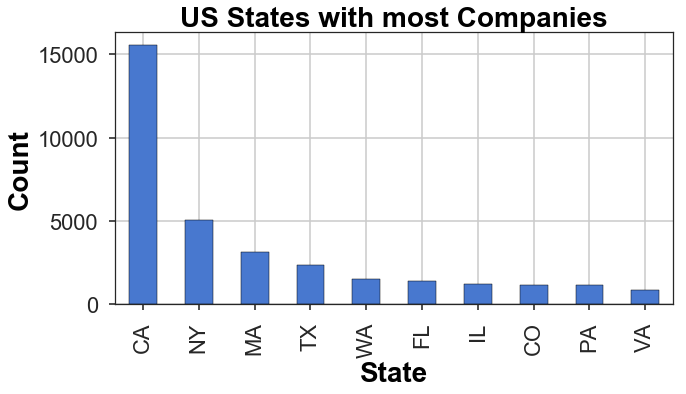

In [45]:
usa_df['state_code'].value_counts().head(10).plot.bar(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Count')
plt.title("US States with most Companies")

### Looking at the frequency of funding values in USA

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


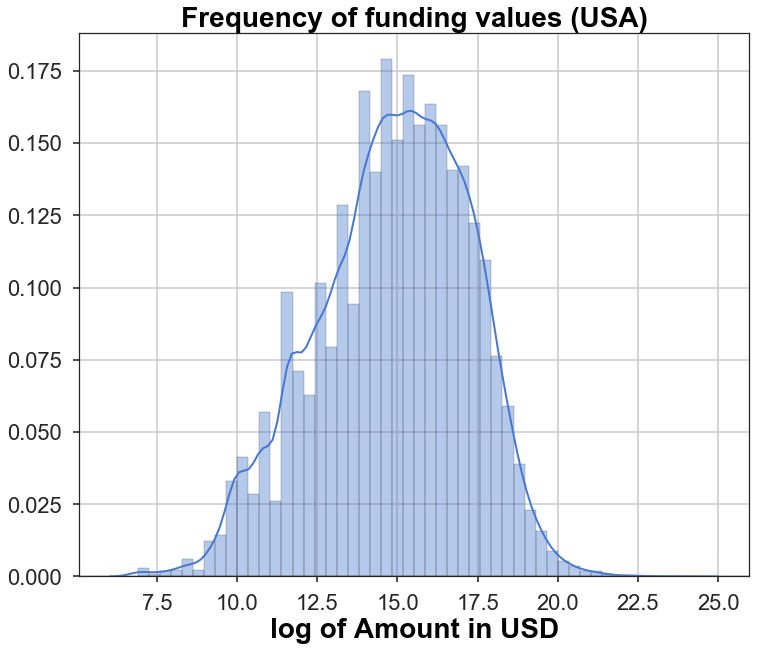

In [46]:
usa_df['USD_log'] = np.log(usa_df['funding_total_usd'] + 1)
plt.figure(figsize=(12,10))
sns.distplot(usa_df['USD_log'].dropna())
plt.xlabel('log of Amount in USD')
plt.title("Frequency of funding values (USA)")
plt.show()

### Saving resulting dataset for 100_analysis_RQ1

In [47]:
normalized_df.to_pickle("../../data/analysis/100_analysis_RQ1.pkl")